### Implementing ANN Classification using Keras and Python GUI tkinter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
diabetes_df = pd.read_csv('Dataset/Diabetes.csv', delimiter=',')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9,89,62,0,0,22.5,0.142,33,0
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0


### Check whether dataset has any Null Values

In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               766 non-null    int64  
 1   Glucose                   766 non-null    int64  
 2   BloodPressure             766 non-null    int64  
 3   SkinThickness             766 non-null    int64  
 4   Insulin                   766 non-null    int64  
 5   BMI                       766 non-null    float64
 6   DiabetesPedigreeFunction  766 non-null    float64
 7   Age                       766 non-null    int64  
 8   Outcome                   766 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [4]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,3.853786,120.909922,69.142298,20.503916,79.788512,31.980157,0.469710,33.254569,0.348564
std,3.369534,31.993193,19.352441,15.959978,115.314391,7.884019,0.325142,11.769761,0.476827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,126.750000,36.575000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129503,0.139481,-0.079766,-0.073305,0.019613,-0.026434,0.544336,0.223770
Glucose,0.129503,1.000000,0.153958,0.057565,0.330515,0.220354,0.136004,0.262841,0.465890
BloodPressure,0.139481,0.153958,1.000000,0.209594,0.090673,0.285381,0.053190,0.240012,0.067997
SkinThickness,-0.079766,0.057565,0.209594,1.000000,0.437131,0.391916,0.181609,-0.113348,0.073939
Insulin,-0.073305,0.330515,0.090673,0.437131,1.000000,0.196667,0.182948,-0.042980,0.128816
BMI,0.019613,0.220354,0.285381,0.391916,0.196667,1.000000,0.133276,0.036118,0.290833
DiabetesPedigreeFunction,-0.026434,0.136004,0.053190,0.181609,0.182948,0.133276,1.000000,0.033870,0.167225
Age,0.544336,0.262841,0.240012,-0.113348,-0.042980,0.036118,0.033870,1.000000,0.238053
Outcome,0.223770,0.465890,0.067997,0.073939,0.128816,0.290833,0.167225,0.238053,1.000000


### Skin Thickness, Insulin, Blood Pressure, Glucose and BMI had no NaNs but some of the data is recorded as 0s. This data doesnot provide any useful information so, replace using the median value.

In [6]:
diabetes_df.SkinThickness.replace(0, diabetes_df.SkinThickness.median(), inplace=True)
diabetes_df.Insulin.replace(0, diabetes_df.Insulin.median(), inplace=True)
diabetes_df.Glucose.replace(0, diabetes_df.Glucose.median(), inplace=True)
diabetes_df.BloodPressure.replace(0, diabetes_df.BloodPressure.median(), inplace=True)
diabetes_df.BMI.replace(0, diabetes_df.BMI.median(), inplace=True)

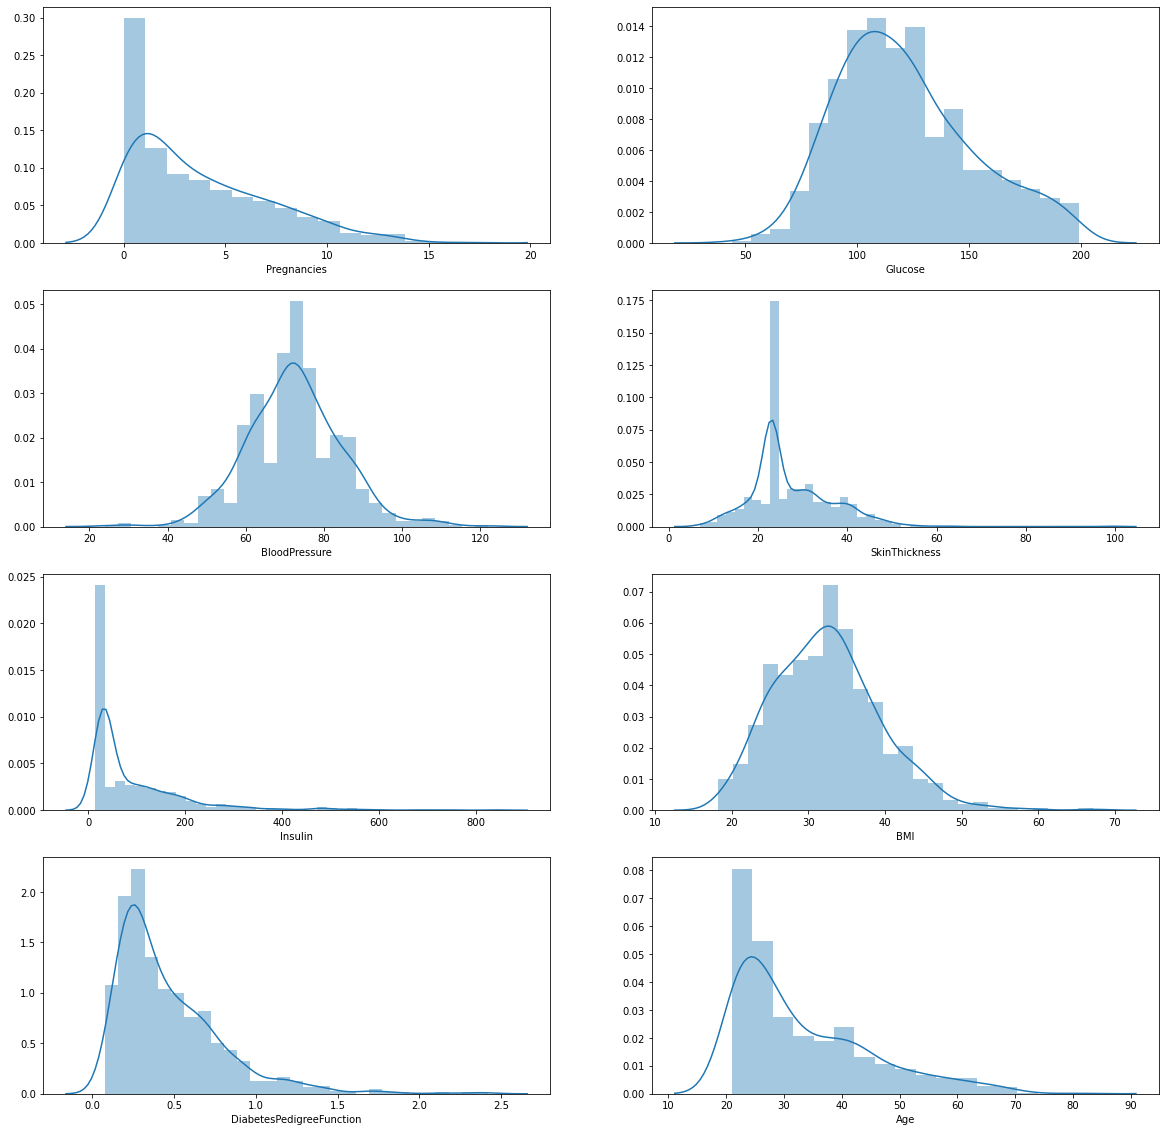

In [7]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(diabetes_df.Pregnancies, ax=axes[0,0])
sns.distplot(diabetes_df.Glucose, ax=axes[0,1])
sns.distplot(diabetes_df.BloodPressure, ax=axes[1,0])
sns.distplot(diabetes_df.SkinThickness, ax=axes[1,1])
sns.distplot(diabetes_df.Insulin, ax=axes[2,0])
sns.distplot(diabetes_df.BMI, ax=axes[2,1])
sns.distplot(diabetes_df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(diabetes_df.Age, ax=axes[3,1])

### Normalize Data For Better Performance
Courtesy: https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

In [8]:
# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# load data
dataset = diabetes_df
# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
normalized = scaler.fit_transform(dataset)
normalized = pd.DataFrame(normalized)
normalized

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.294118,0.464516,0.510204,0.173913,0.019832,0.151329,0.052519,0.150000,0.0
...,...,...,...,...,...,...,...,...,...
761,0.529412,0.290323,0.387755,0.173913,0.019832,0.087935,0.027327,0.200000,0.0
762,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
763,0.117647,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,0.0
764,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0


### Setting up Neural Network for training Data

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# first neural network with keras tutorial
# split into input (X) and output (y) variables
X = normalized.iloc[:,0:8]
y = normalized.iloc[:,8]

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5705
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.6514
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.6514
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.6527
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.6540
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.6710
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.6736
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5675 - accuracy: 0.7285
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.7389
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7428
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7859
Epoch 81/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7820
Epoch 82/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7859
Epoch 83/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7898
Epoch 84/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7846
Epoch 85/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7859
Epoch 86/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.7872
Epoch 87/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7872
Epoch 88/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.7833
Epoch 89/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.7937
Epoch 90/150


In [11]:
# Test case 1,93,70,31,0,30.4,0.315,23 
# Output: 0

### GUI Code

In [12]:
from tkinter import *
import tkinter.messagebox as msgBox

def predictModel():
    
    predict_input = pd.DataFrame(np.array([pregnancies.get(), glucose.get(), BloodPressure.get(),
                                          SkinThickness.get(), Insulin.get(), BMI.get(), DiabetesPedigreeFunction.get(),
                                          Age.get()]).reshape(1, -1)).rename(
    columns={0:'Pregnancies' , 1: 'Glucose', 2:'BloodPressure' , 3:'SkinThickness' , 4:'Insulin',
             5:'BMI', 6: 'DiabetesPedigreeFunction', 7: 'Age'})
    
    predict_input.SkinThickness.replace(0, diabetes_df.SkinThickness.median(), inplace=True)
    predict_input.Insulin.replace(0, diabetes_df.Insulin.median(), inplace=True)
    predict_input.Glucose.replace(0, diabetes_df.Glucose.median(), inplace=True)
    predict_input.BloodPressure.replace(0, diabetes_df.BloodPressure.median(), inplace=True)
    predict_input.BMI.replace(0, diabetes_df.BMI.median(), inplace=True)
    
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(predict_input)
    result = model.predict(normalized)[0][0]
    
    if round(result) == 1:
        msgBox.showinfo(title="Prediction", message="You have Diabetes according to Predictor")
    else:
        msgBox.showinfo(title="Prediction", message="You DONOT have Diabetes according to Predictor")


#window
tkWindow = Tk() 
tkWindow.minsize(300, 222)  
tkWindow.maxsize(300, 232)  
tkWindow.title('Diabetes Prediction Using Neural Network')

pregnancies_label = Label(tkWindow, text="Number of Pregnancies").grid(row=1, column=0, sticky=W)
pregnancies = IntVar()
pregnanciesEntry = Entry(tkWindow, textvariable=pregnancies).grid(row=1, column=1)  


glucoseLabel = Label(tkWindow,text="Glucose Level").grid(row=2, column=0, sticky=W)  
glucose = DoubleVar()
glucoseEntry = Entry(tkWindow, textvariable=glucose).grid(row=2, column=1)  

BloodPressureLabel = Label(tkWindow,text="Blood Pressure Level").grid(row=3, column=0, sticky=W)  
BloodPressure = DoubleVar()
BloodPressureEntry = Entry(tkWindow, textvariable=BloodPressure).grid(row=3, column=1)  

SkinThicknessLabel = Label(tkWindow,text="SkinThickness").grid(row=4, column=0, sticky=W)  
SkinThickness = DoubleVar()
SkinThicknessEntry = Entry(tkWindow, textvariable=SkinThickness).grid(row=4, column=1)  

InsulinLabel = Label(tkWindow,text="Insulin").grid(row=5, column=0, sticky=W)  
Insulin = DoubleVar()
InsulinEntry = Entry(tkWindow, textvariable=Insulin).grid(row=5, column=1)  

BMILabel = Label(tkWindow,text="BMI").grid(row=6, column=0, sticky=W)  
BMI = DoubleVar()
BMIEntry = Entry(tkWindow, textvariable=BMI).grid(row=6, column=1)  

DiabetesPedigreeFunctionLabel = Label(tkWindow,text="DiabetesPedigreeFunction").grid(row=7, column=0, sticky=W)  
DiabetesPedigreeFunction = DoubleVar()
DiabetesPedigreeFunctionEntry = Entry(tkWindow, textvariable=DiabetesPedigreeFunction).grid(row=7, column=1)  

AgeLabel = Label(tkWindow,text="Age").grid(row=8, column=0, sticky=W)  
Age = DoubleVar()
AgeEntry = Entry(tkWindow, textvariable=Age).grid(row=8, column=1) 

submitButton = Button(tkWindow, text="FEED DATA", command=predictModel).grid(row=20, padx = 5, pady = 5, sticky=S)  

tkWindow.mainloop()

                                                Prepared By J. Haripriya